# Exploring airplane crashes
The aviation accident database throughout the world, from 1908-2019.¶


# Features:
Date: Date of accident, in the format - January 01, 2001

Time: Local time, in 24 hr. format unless otherwise specified

Airline/Op: Airline or operator of the aircraft

Flight #: Flight number assigned by the aircraft operator

Route: Complete or partial route flown prior to the accident

AC Type: Aircraft type

Reg: ICAO registration of the aircraft

cn / ln: Construction or serial number / Line or fuselage number

Aboard: Total aboard (passengers / crew)

Fatalities: Total fatalities aboard (passengers / crew)
Ground: Total killed on the ground

Summary: Brief description of the accident and cause if known

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# 1) Data Cleaning

In [3]:
df_main = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
df_main['Date']= pd.to_datetime(df_main['Date'])
df_main.sample(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
665,1944-09-02,NaN,"Belgrad, Yugoslavia",Deutsche Lufthansa,NaN,NaN,Junkers JU52/3m,D-AUAW,641039,5.0,5.0,0.0,Shot down by allied fighters.
4724,2000-06-27,NaN,"Off Shimano, Japan",Military - Japanese Air Self-Defence Force,NaN,Training,Kawasaki C-1A,88-1027,8027,5.0,5.0,0.0,Crashed into the sea during a test flight.
2099,1967-11-03,11:30,"Near Curitiba, Brazil",Sadia,NaN,Sao Paulo - Curitiba,Handley Page HPR-7 Herald 214,PP-SDJ,190,25.0,21.0,0.0,Crashed into hill while on approach. Improper ...
651,1944-06-06,02:00,"Flamanville, France",Military - U.S. Army Air Forces,NaN,NaN,Douglas C-47A,42-100905,19368,22.0,22.0,0.0,Shot down by anti-aircraft fire during the Nor...
5239,2008-11-16,10:32,"Thormanby Island, British Columbia, Canada",PacifiCoastal Airlines,NaN,Vancouver - Powell River - Toba Inlet,Grumman G-21A Goose,C-FPCK,1187,8.0,7.0,0.0,The charter aircraft crashed into a steep hill...
3139,1979-05-25,20:40,"Bullen Point, Alaska",Sea Airmotive,NaN,Bullen Point - Deadhorse,de Havilland Canada DHC-4A Caribou,N581PA,253,3.0,3.0,0.0,The cargo plane crashed in heavy crosswind whi...
81,1923-12-24,NaN,"Egbert, WY",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,315,NaN,1.0,1.0,0.0,NaN
5045,2005-03-31,20:00,"Near Rovie, Albania",Military - U.S. Air Force,NaN,Training,Lockheed Hercules MC-130H,87-0127,5118,9.0,9.0,0.0,While on a training mission the aircraft crash...
4199,1993-08-18,16:56,"Leeward Point Airfield, Guantanamo Bay, Cuba",American International Airways,808,"Norfolk, VA - Guantanamo, Cuba",McDonnell Douglas DC-8-61,N814CK,46127,3.0,0.0,0.0,The plane crashed 1/4 of a mile short of the r...
2580,1972-08-12,NaN,"Near Delhi, India",Indian Airlines,NaN,Gwalior - Delhi,Fokker F-27 Friendship 100,VT-DME,10175,18.0,18.0,0.0,Crashed on second approach after the pilot use...


In [4]:
df_main.shape

(5268, 13)

In [5]:
# get the number of missing data points per column
missing_values_count = df_main.isnull().sum()
missing_values_count 

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [6]:
# percent of data missing in each column
df_main.isnull().mean().sort_values()*100

Date             0.000000
Fatalities       0.227790
Operator         0.341686
Location         0.379651
Aboard           0.417616
Ground           0.417616
Type             0.512528
Registration     6.359150
Summary          7.403189
cn/In           23.310554
Route           32.384207
Time            42.122248
Flight #        79.707669
dtype: float64

In [7]:
list_columns = list(df_main.columns)
for col in list_columns:
    print('Number of Uniques in',col,'is',df_main[col].nunique())
print('\n')
print(df_main.info())

#mostly catagorical data

Number of Uniques in Date is 4753
Number of Uniques in Time is 1005
Number of Uniques in Location is 4303
Number of Uniques in Operator is 2476
Number of Uniques in Flight # is 724
Number of Uniques in Route is 3244
Number of Uniques in Type is 2446
Number of Uniques in Registration is 4905
Number of Uniques in cn/In is 3707
Number of Uniques in Aboard is 239
Number of Uniques in Fatalities is 191
Number of Uniques in Ground is 50
Number of Uniques in Summary is 4673


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   datetime64[ns]
 1   Time          3049 non-null   object        
 2   Location      5248 non-null   object        
 3   Operator      5250 non-null   object        
 4   Flight #      1069 non-null   object        
 5   Route         3562 non-null   object        
 6   Type          

By intuition, Flight # of the plane has no effect on the plane crash, hence drop column Flight #

The data on cn/In and Registration are relatively unique for each data set, hence drop as well, nothing to do with accidents

Summary is only good when using NLP model when doing Sentimental Analysis, hence drop column Summary

almost half of the data has no time recorded, hence drop Time

most of the routes are unique too, and most of them are missing, hence drop

the ground victims are zero for most cases, and they are not contributing to the causes of plane crash, hence drop


In [8]:
df_drop_columns=df_main.drop(columns=['Flight #','Registration','cn/In','Summary','Time','Route','Ground'])
df_drop_columns

,Date,Location,Operator,Type,Aboard,Fatalities
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0
...,...,...,...,...,...,...
5263,2009-05-20,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0
5264,2009-05-26,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0
5265,2009-06-01,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0
5266,2009-06-07,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0


In [9]:
df_drop_columns.describe(include='all')

,Date,Location,Operator,Type,Aboard,Fatalities
count,5268,5248,5250,5241,5246.000000,5256.000000
unique,4753,4303,2476,2446,NaN,NaN
top,1973-02-28 00:00:00,"Sao Paulo, Brazil",Aeroflot,Douglas DC-3,NaN,NaN
freq,4,15,179,334,NaN,NaN
first,1908-09-17 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2009-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,27.554518,20.068303
std,NaN,NaN,NaN,NaN,43.076711,33.199952
min,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,5.000000,3.000000


In [10]:
df_clean=df_drop_columns.dropna(subset=['Aboard','Fatalities'], how='all')
df_clean = df_clean[df_clean['Aboard']!=0]
df_clean

,Date,Location,Operator,Type,Aboard,Fatalities
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0
...,...,...,...,...,...,...
5263,2009-05-20,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0
5264,2009-05-26,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0
5265,2009-06-01,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0
5266,2009-06-07,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0


In [11]:
# partial missing, fill na: Ground> mode= 0, Aboard == Fatalities,
# dataset with missing values in all Fatalities, Aboard, Ground  are removed.


In [12]:
df_clean.isnull().sum()

Date           0
Location      19
Operator      18
Type          25
Aboard        10
Fatalities     0
dtype: int64

In [13]:
df_clean[df_clean['Aboard']==df_clean['Fatalities']]

,Date,Location,Operator,Type,Aboard,Fatalities
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0
6,1915-09-03,"Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),19.0,19.0
7,1916-07-28,"Near Jambol, Bulgeria",Military - German Army,Schutte-Lanz S-L-10 (airship),20.0,20.0
...,...,...,...,...,...,...
5262,2009-05-03,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,Mi-35,18.0,18.0
5264,2009-05-26,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0
5265,2009-06-01,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0
5266,2009-06-07,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0


In [14]:
df_clean[df_clean['Aboard'].isnull()]

,Date,Location,Operator,Type,Aboard,Fatalities
348,1935-03-07,"Schievelbein, Germany",Deruluft,Rochrbach Roland,NaN,3.0
526,1939-09-26,North Sea,KLM Royal Dutch Airlines,Douglas DC-3,NaN,1.0
587,1942-08-13,"Algiers, Algeria",Air France,Liore et Olivier H-246 Air Boat,NaN,4.0
832,1946-12-25,"Lunghwa, Shanghai, China",China National Aviation Corporation,"Curtiss C-46, C-47, DC-3",NaN,87.0
1479,1957-04-20,"Jirkouk, Iraq",Air France,Lockheed Super Constellation,NaN,1.0
3007,1977-11-03,"Belgrade, Yugoslavia",El Al,Boeing B-747,NaN,1.0
3323,1981-12-16,"Kuala Belait, Brunei",Bristow Helicopters,Aerospatiale Puma,NaN,12.0
3369,1982-08-11,PacifiOcean,Pan American World Airways,Boeing B-747-121,NaN,1.0
3843,1989-05-09,"Near Tainjin, China",Aero Asahi,Bell 412,NaN,10.0
4080,1992-02-20,En route from Argentina to California,Aerolineas Argentinas,Boeing B-747,NaN,1.0


In [15]:
list_of_Aboard_null = list(df_clean[df_clean['Aboard'].isnull()].index)
print(list_of_Aboard_null)
list_of_ref_Fata = list(df_clean[df_clean['Aboard'].isnull()]['Fatalities'])
print(list_of_ref_Fata)

[348, 526, 587, 832, 1479, 3007, 3323, 3369, 3843, 4080]
[3.0, 1.0, 4.0, 87.0, 1.0, 1.0, 12.0, 1.0, 10.0, 1.0]


In [16]:
for i,row in enumerate(list_of_Aboard_null):
    df_clean.at[row,'Aboard'] = list_of_ref_Fata[i]
    
    

In [17]:
df_clean.loc[list_of_Aboard_null]

,Date,Location,Operator,Type,Aboard,Fatalities
348,1935-03-07,"Schievelbein, Germany",Deruluft,Rochrbach Roland,3.0,3.0
526,1939-09-26,North Sea,KLM Royal Dutch Airlines,Douglas DC-3,1.0,1.0
587,1942-08-13,"Algiers, Algeria",Air France,Liore et Olivier H-246 Air Boat,4.0,4.0
832,1946-12-25,"Lunghwa, Shanghai, China",China National Aviation Corporation,"Curtiss C-46, C-47, DC-3",87.0,87.0
1479,1957-04-20,"Jirkouk, Iraq",Air France,Lockheed Super Constellation,1.0,1.0
3007,1977-11-03,"Belgrade, Yugoslavia",El Al,Boeing B-747,1.0,1.0
3323,1981-12-16,"Kuala Belait, Brunei",Bristow Helicopters,Aerospatiale Puma,12.0,12.0
3369,1982-08-11,PacifiOcean,Pan American World Airways,Boeing B-747-121,1.0,1.0
3843,1989-05-09,"Near Tainjin, China",Aero Asahi,Bell 412,10.0,10.0
4080,1992-02-20,En route from Argentina to California,Aerolineas Argentinas,Boeing B-747,1.0,1.0


In [18]:
df_clean =df_clean.fillna(value='Unknown')
df_clean['Date']  = pd.to_datetime(df_clean['Date'])
df_clean.head(20)

,Date,Location,Operator,Type,Aboard,Fatalities
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0
5,1915-03-05,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),41.0,21.0
6,1915-09-03,"Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),19.0,19.0
7,1916-07-28,"Near Jambol, Bulgeria",Military - German Army,Schutte-Lanz S-L-10 (airship),20.0,20.0
8,1916-09-24,"Billericay, England",Military - German Navy,Zeppelin L-32 (airship),22.0,22.0
9,1916-10-01,"Potters Bar, England",Military - German Navy,Zeppelin L-31 (airship),19.0,19.0


# 2) Feature engineering

In [19]:
df_clean= df_clean.set_index('Date')

In [20]:
df_clean['Year'] = df_clean.index.year
df_clean['Month'] = df_clean.index.month  
df_clean['Weekday_name'] = df_clean.index.day_name()

In [21]:
df_clean.sample(10)

,Location,Operator,Type,Aboard,Fatalities,Year,Month,Weekday_name
Date,,,,,,,,
2002-03-14,"Near Placetas, Cuba",Charter - Aerotaxi,Antonov AN-2,17.0,17.0,2002,3,Thursday
1998-10-10,"Near Kindu, Congo",Congo Airline,Boeing B-727-30,41.0,41.0,1998,10,Saturday
1985-02-06,"Altus, Oklahoma",Air Taxi - Oklahoma Airways Inc.,Cessna 402B,2.0,2.0,1985,2,Wednesday
1998-07-28,"Barcelona, Spain",Swifair,Swearingen SA.227AC Metro III,2.0,2.0,1998,7,Tuesday
2001-10-04,"110 miles SW of Sochi, Russia",Sibir Airlines,Tupolev Tu-154M,78.0,78.0,2001,10,Thursday
1957-05-13,"Near San Carlos de Bariloche, Argentina",Lineas Aereas del Estado,Vickers 615 Viking 1B,16.0,16.0,1957,5,Monday
2002-12-27,"Anjouan, Comoros Islands",Ocean Airlines,Let 410UVP,16.0,1.0,2002,12,Friday
1960-04-12,"Pelotas, Brazil",Cruzeiro,Douglas DC-3,22.0,10.0,1960,4,Tuesday
1928-06-22,"Lebo, Kansas",National Air Transport,Douglas M-4,1.0,1.0,1928,6,Friday


In [22]:
df_clean['isMilitary'] = df_clean.Operator.str.contains('MILITARY',case=False)
df_clean

,Location,Operator,Type,Aboard,Fatalities,Year,Month,Weekday_name,isMilitary
Date,,,,,,,,,
1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,1908,9,Thursday,True
1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,1912,7,Friday,True
1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,1913,8,Wednesday,False
1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,1913,9,Tuesday,True
1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,1913,10,Friday,True
...,...,...,...,...,...,...,...,...,...
2009-05-20,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,2009,5,Wednesday,True
2009-05-26,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,2009,5,Tuesday,False
2009-06-01,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,2009,6,Monday,False


# 3) Visualisation

# 85% of the plane Crash comes from Commercial Airline

85.0% of the plane crash belongs to Commercial Airline 


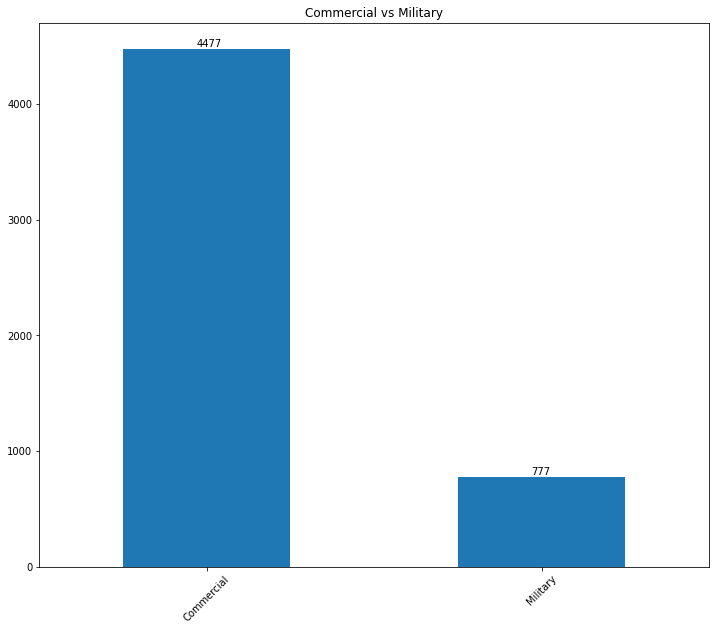

In [23]:
plt.figure(figsize=(12,10))

ax=df_clean.groupby('isMilitary').size().plot(kind = 'bar')
plt.title('Commercial vs Military')
x_offset = -0.03
y_offset = 20
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
print(f"{round(100-df_clean['isMilitary'].mean()*100)}% of the plane crash belongs to Commercial Airline ")
plt.xticks([0,1],['Commercial','Military'],rotation=45)
plt.xlabel('')
plt.rcParams.update({'font.size': 15})
plt.show()

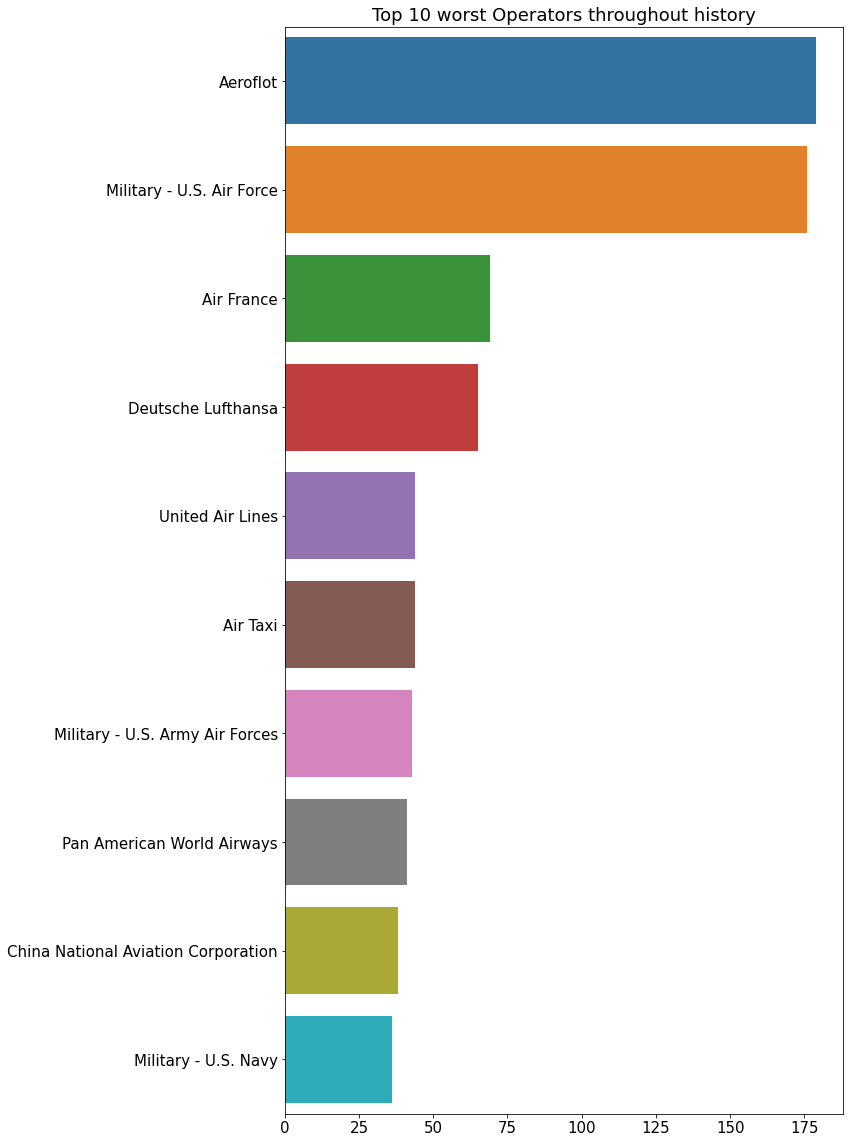

In [49]:
df_types = df_clean[df_clean['Operator']!='Unknown']
counts_types=df_types['Operator'].value_counts()[:10]


plt.figure(figsize=(10,20))
plt.title('Top 10 worst Operators throughout history')
ax=sns.barplot(y=counts_types.index, x = counts_types.values,orient='h')
plt.rcParams.update({'font.size': 15})

# Due to increase in demand of airplane's transport, the number of accident rises. 
# It gradually drops when people impliment more safety measures

# Sharp increase due to WWII

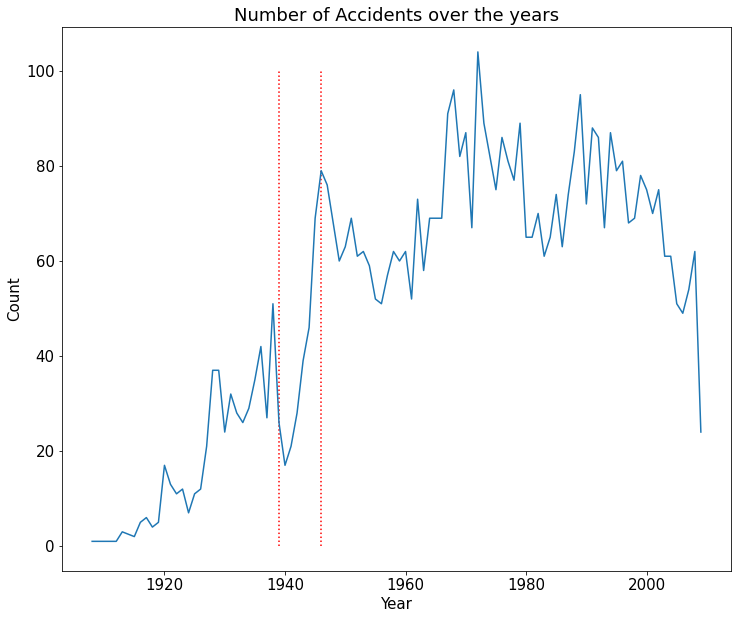

WWII happens between Sep 1939 and Sep 1945


In [25]:
plt.figure(figsize=(12,10))

ax = df_clean.groupby('Year').size().plot()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Accidents over the years')

_ = ax.vlines(x=[1939,1946], ymin=0, ymax=100, colors='r',linestyles ='dotted')
plt.rcParams.update({'font.size': 15})

plt.show()
print('WWII happens between Sep 1939 and Sep 1945')

# Fatalities rate has improved over the years, maybe now pilots can better deal with emergency landing.

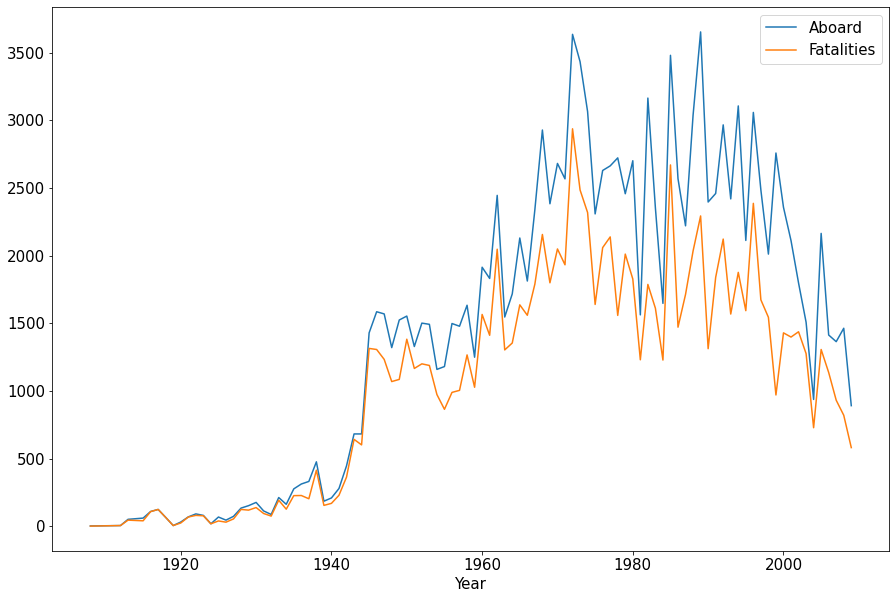

In [26]:
plt.figure(figsize=(15,10))
df_clean.groupby('Year')['Aboard'].sum().plot(kind='line')
df_clean.groupby('Year')['Fatalities'].sum().plot(kind='line' )
plt.legend()
plt.rcParams.update({'font.size': 15})

plt.show()


# Pilots tend to operate the plane more carefully when dealing with large number of passengers

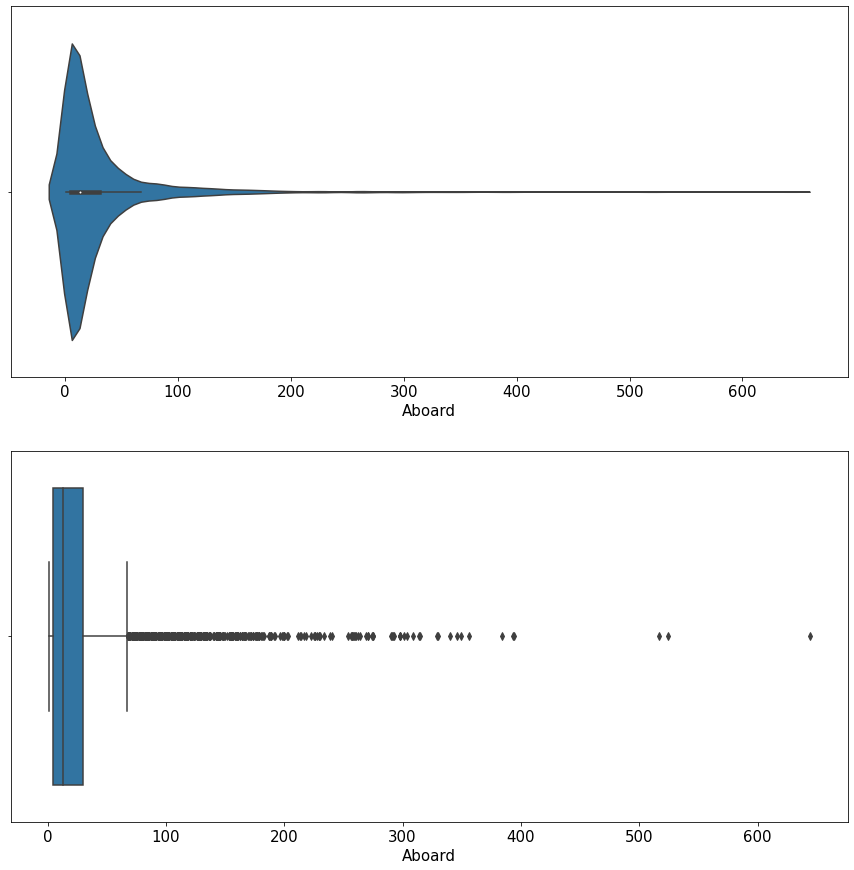

count    5254.000000
mean       27.535592
std        43.059919
min         1.000000
25%         5.000000
50%        13.000000
75%        30.000000
max       644.000000
Name: Aboard, dtype: float64


In [27]:
f, axes = plt.subplots(2,1, figsize=(15, 15))


sns.violinplot(x=df_clean['Aboard'], ax = axes[0])
#plt.title('Number of Passengers Aboard')

sns.boxplot(x=df_clean['Aboard'],ax = axes[1])
#plt.title('Number of Passengers Aboard')
plt.rcParams.update({'font.size': 15})
plt.show()
stats_aboard = df_clean['Aboard'].describe()
print(stats_aboard)

In [28]:
IQR=stats_aboard['75%']-stats_aboard['25%']
top_whisker = stats_aboard['75%'] + 1.5*IQR
btm_whiskers = stats_aboard['25%'] - 1.5*IQR
print('Non-outliers lie between',btm_whiskers,'and',top_whisker)

Non-outliers lie between -32.5 and 67.5


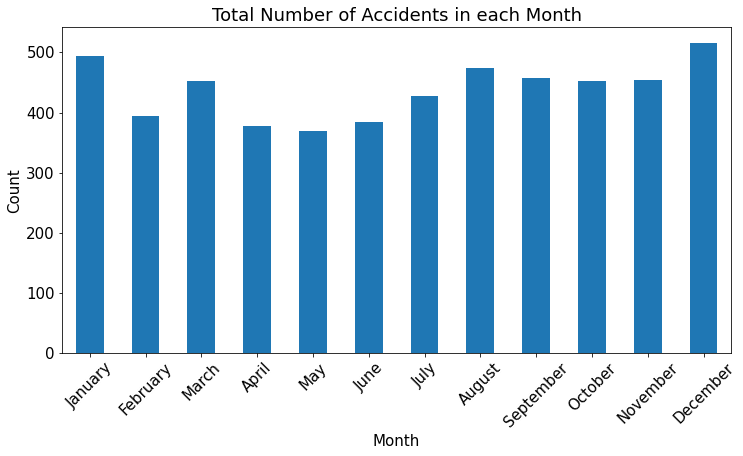

In [29]:
plt.figure(figsize=(12,6))

df_clean.groupby('Month').size().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Total Number of Accidents in each Month')
plt.xticks(np.arange(12),['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],rotation = 45)
plt.show()

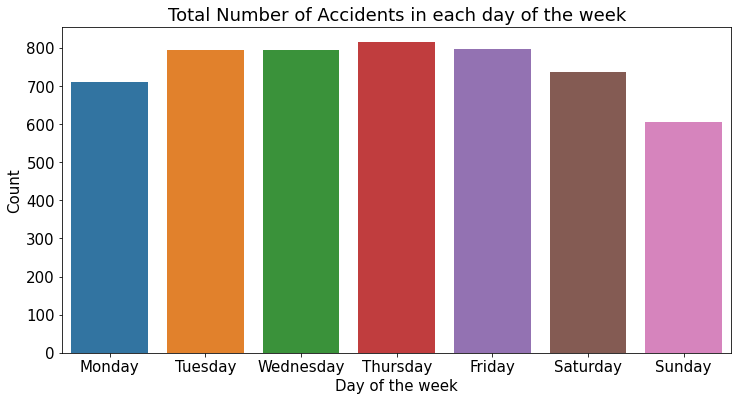

In [30]:
plt.figure(figsize=(12,6))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
grouped_day=df_clean.groupby(['Weekday_name']).size()
sns.barplot(x = grouped_day.index, y=grouped_day.values,order = order)
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Total Number of Accidents in each day of the week')

plt.show()

# Location
## Where is more likely for Plane Crash to take place?

In [31]:
def getLat(address):
    #Importing the Nominatim geocoder class 
    from geopy.geocoders import Nominatim

    #address we need to geocode
    loc = address

    #making an instance of Nominatim class
    geolocator = Nominatim(user_agent="my_request")

    #applying geocode method to get the location
    try: 
        location = geolocator.geocode(loc)
        lat = location.latitude
    except:
        lat = 'error'

    return lat
    

In [32]:
def getLong(address):
    #Importing the Nominatim geocoder class 
    from geopy.geocoders import Nominatim

    #address we need to geocode
    loc = address

    #making an instance of Nominatim class
    geolocator = Nominatim(user_agent="my_request")

    #applying geocode method to get the location
    try: 
        location = geolocator.geocode(loc)
        long = location.longitude
    except:
        long = 'error'

    #printing address and coordinates
    return long

In [33]:
df_sample= df_clean[df_clean['Location']!='Unknown'].sample(200,random_state = 123)
df_sample

,Location,Operator,Type,Aboard,Fatalities,Year,Month,Weekday_name,isMilitary
Date,,,,,,,,,
1995-05-09,"Cerro San Jeronimo, Colombia",ADES Colombia,Curtiss C-46F,9.0,9.0,1995,5,Tuesday,False
1956-12-22,"Mt. Giner, Italy",Linee Aeree Italiane,Douglas DC-3,21.0,21.0,1956,12,Saturday,False
1954-03-19,"Near Lothian, Maryland",Military - U.S. Air Force,Fairchild C-110F,18.0,18.0,1954,3,Friday,True
1979-09-30,"Porpoise Bay, British Columbia Canada",West Coast Air,de Havilland Canada DHC-6 Twin Otter 200,16.0,2.0,1979,9,Sunday,False
1998-05-26,"Near Erdenet, Mongolia",MIAT - Mongolian Airlines,Harbin Yunshuji Y-12 II,28.0,28.0,1998,5,Tuesday,False
...,...,...,...,...,...,...,...,...,...
1975-08-15,"Krasnovodsk, USSR",Aeroflot,Yakovlev YAK-40,28.0,28.0,1975,8,Friday,False
1979-03-10,"Off Marina del Rey, California",Swift Aire Lines Inc.,Aerospatiale Nord 262A-33,7.0,3.0,1979,3,Saturday,False
1975-03-20,"Near Quilcene, Washington",Military - U.S. Air Force,Lockheed C-141A (L.300),16.0,16.0,1975,3,Thursday,True


In [34]:
#df_sample.insert(loc=1,column='Lat',value=list(df_sample['Location'].apply(getLat)))
#df_sample.insert(loc=2,column='Long',value=list(df_sample['Location'].apply(getLong)))
#df_locations=df_sample[(df_sample['Lat']!='error') | (df_sample['Long']!='error')]
#df_locations.to_csv('Plane_crash_locations.csv')

In [35]:
df_locations = pd.read_csv('Plane_crash_locations.csv',index_col = 'Date')

In [36]:
df_locations.head()

,Location,Lat,Long,Operator,Type,Aboard,Fatalities,Year,Month,Weekday_name
Date,,,,,,,,,,
1968-11-22,"San Francisco, California",37.779026,-122.419906,Japan Air Lines,McDonnell Douglas DC-8-62,107.0,0.0,1968,11,Friday
1990-12-21,"Near False Pass, Alaska",54.841942,-163.397815,MarkAir Commuter,Cessna 208 Caravan I,1.0,1.0,1990,12,Friday
1950-01-20,"Near Vacas, Bolivia",-17.572530,-65.579155,Military - Bolivian Air Force,Douglas C-47,32.0,32.0,1950,1,Friday
2001-03-24,"Gustavia, St. Barthélémy, French West Indies",17.895178,-62.850408,Air Caraibes,de Havilland Canada DHC-6 Twin Otter,19.0,19.0,2001,3,Saturday
1958-02-01,"Rio de Janeiro, Brazil",-22.911014,-43.209373,Loide Aéreo Nacional,Douglas DC-4,67.0,5.0,1958,2,Saturday


In [37]:
import folium
def generateBaseMap(default_location=[37.76, -20], default_zoom_start=1):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map


from folium.plugins import HeatMap
base_map = generateBaseMap()

for i in range(len(df_locations)):
    folium.Marker(location = [df_locations.iloc[i]['Lat'],df_locations.iloc[i]['Long']],
                  popup = str(df_locations.iloc[i]['Location'])).add_to(base_map)
    
HeatMap(data = df_locations[['Lat','Long']], radius=30, max_zoom=13).add_to(base_map)
display(base_map)

# Adopt K-means cluttering method to find common groups

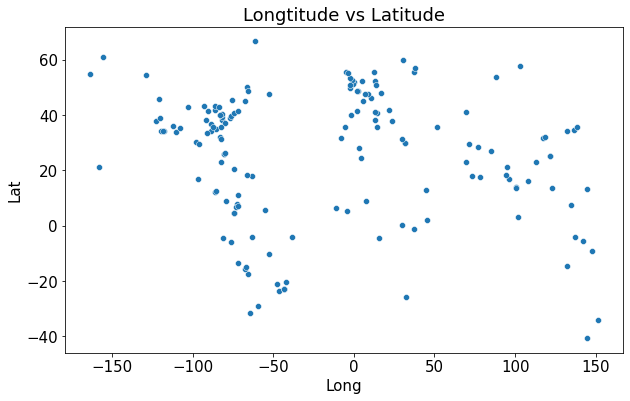

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Long', y ='Lat', data = df_locations)
plt.title('Longtitude vs Latitude')
plt.show()

# Types
### Which types of plane are more likely to face accident

In [39]:
df_types['Type'].value_counts()[:10]

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 60
Douglas DC-4                                 40
Yakovlev YAK-40                              37
Antonov AN-26                                36
Junkers JU-52/3m                             32
Douglas C-47B                                29
De Havilland DH-4                            27
Name: Type, dtype: int64

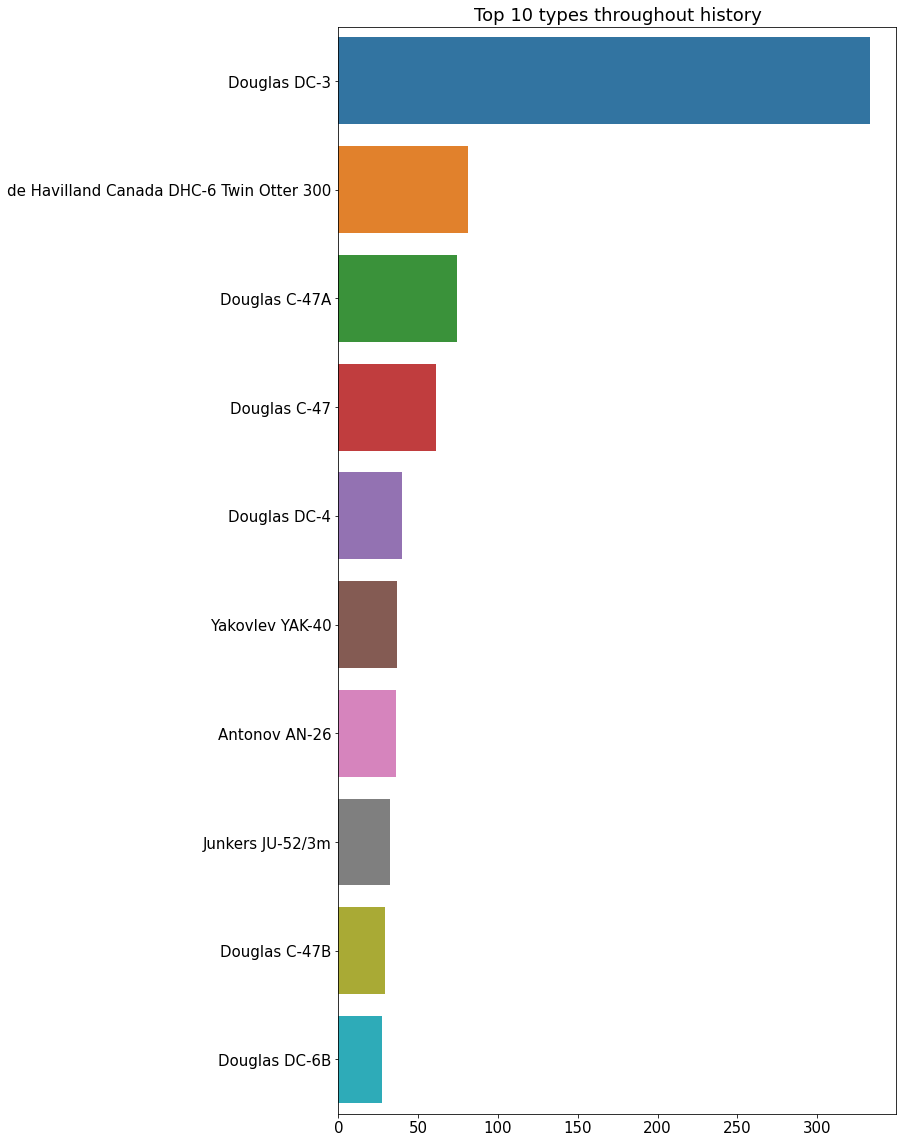

In [40]:
df_types = df_clean[df_clean['Type']!='Unknown']
counts_types=df_types['Type'].value_counts()[:10]


plt.figure(figsize=(10,20))
plt.title('Top 10 types throughout history')
ax=sns.barplot(y=counts_types.index, x = counts_types.values,orient='h')
plt.rcParams.update({'font.size': 15})


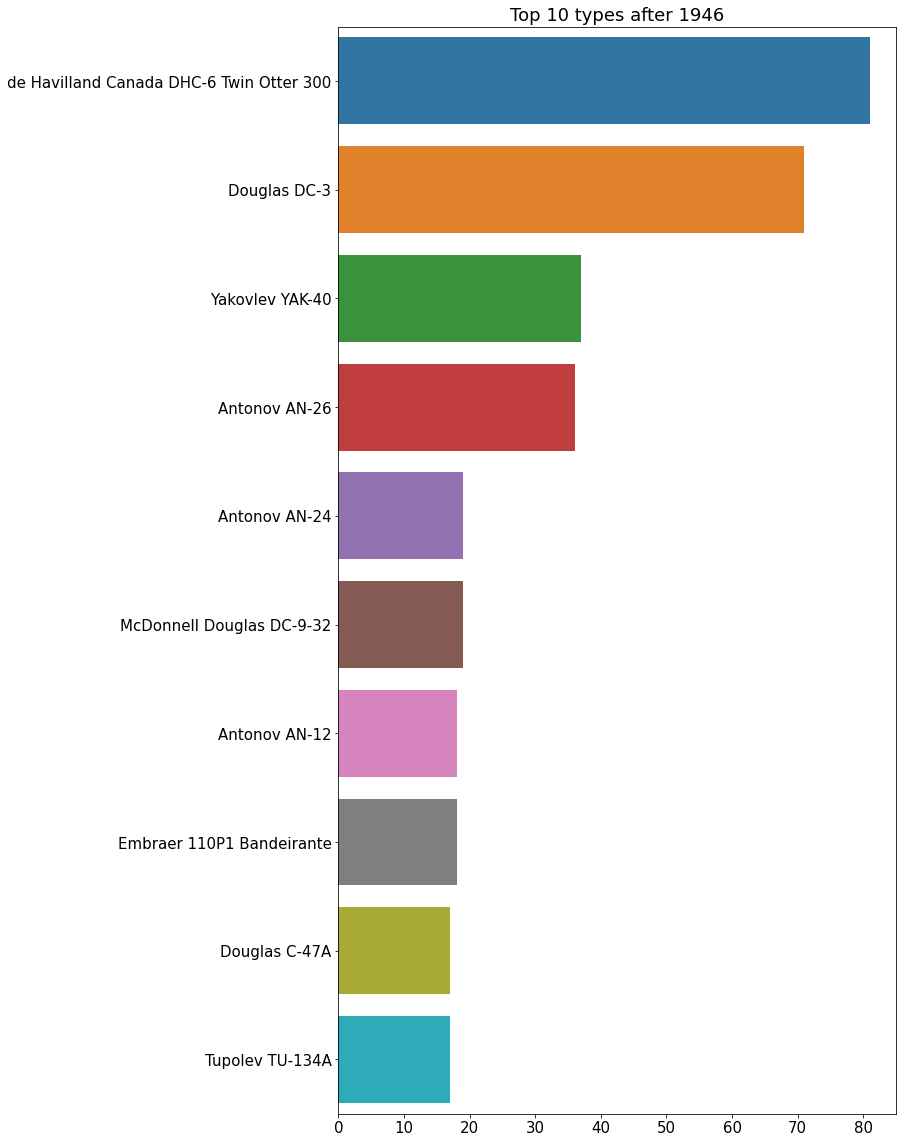

In [41]:
df_types = df_clean[df_clean['Type']!='Unknown'].iloc[1946:]
counts_types=df_types['Type'].value_counts()[:10]


plt.figure(figsize=(10,20))
plt.title('Top 10 types after 1946')
ax=sns.barplot(y=counts_types.index, x = counts_types.values,orient='h')
plt.rcParams.update({'font.size': 15})


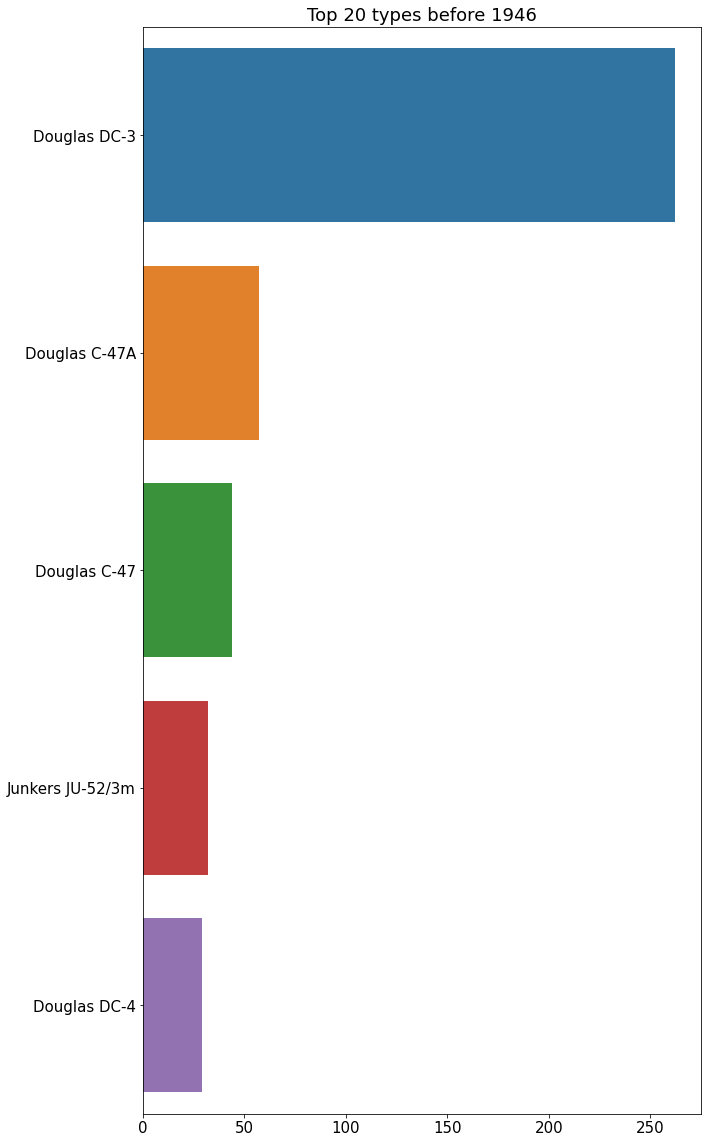

In [42]:
df_types = df_clean[df_clean['Type']!='Unknown'].iloc[:1946]
counts_types=df_types['Type'].value_counts()[:5]


plt.figure(figsize=(10,20))
plt.title('Top 20 types before 1946')
ax=sns.barplot(y=counts_types.index, x = counts_types.values,orient='h')

In [43]:
df_clean['Type'].nunique()

2443

### Summary
Most of crashes come from Commercial Airline

Planes with lesser passengers more likely to crash

pilots can better deal with emergency landing 

All aircraft types (except DHC-6 & DC-3) does not relate to any accidents

